In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the features
df = pd.read_csv('../data/processed/features.csv')

# Look at first 5 rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

                                            filename   genre       tempo  \
0  Bel Mercy (BEAUZ Hard Techno Remix) feat. Noki...  techno  161.499023   
1                  Jayron - FIYA! (EXTENDED MIX).wav  techno  161.499023   
2               Jayron - Knock Knock (MASTER V2).wav  techno  161.499023   
3  KATSEYE- GNARLY (Jessica Audiffred remix) fina...  techno  151.999081   
4  KX CHR - YASUO _FREE DL EXTENDED_ - KX CHR - S...  techno  151.999081   

   spectral_centroid  mfcc_0_mean  mfcc_0_std  mfcc_1_mean  mfcc_1_std  \
0        2178.130795   -29.931030   80.782211    95.463753   46.796745   
1        2689.821270    46.873638   37.884727    74.714706   21.532454   
2        2814.702960   -66.204758   71.347969    69.497360   46.806564   
3        3009.739596     3.646373   62.072689    61.661694   33.323685   
4        2602.093109    -8.876310   75.326546    58.080956   28.183014   

   mfcc_2_mean  mfcc_2_std  ...  mfcc_8_mean  mfcc_8_std  mfcc_9_mean  \
0    -4.770218   25.76721

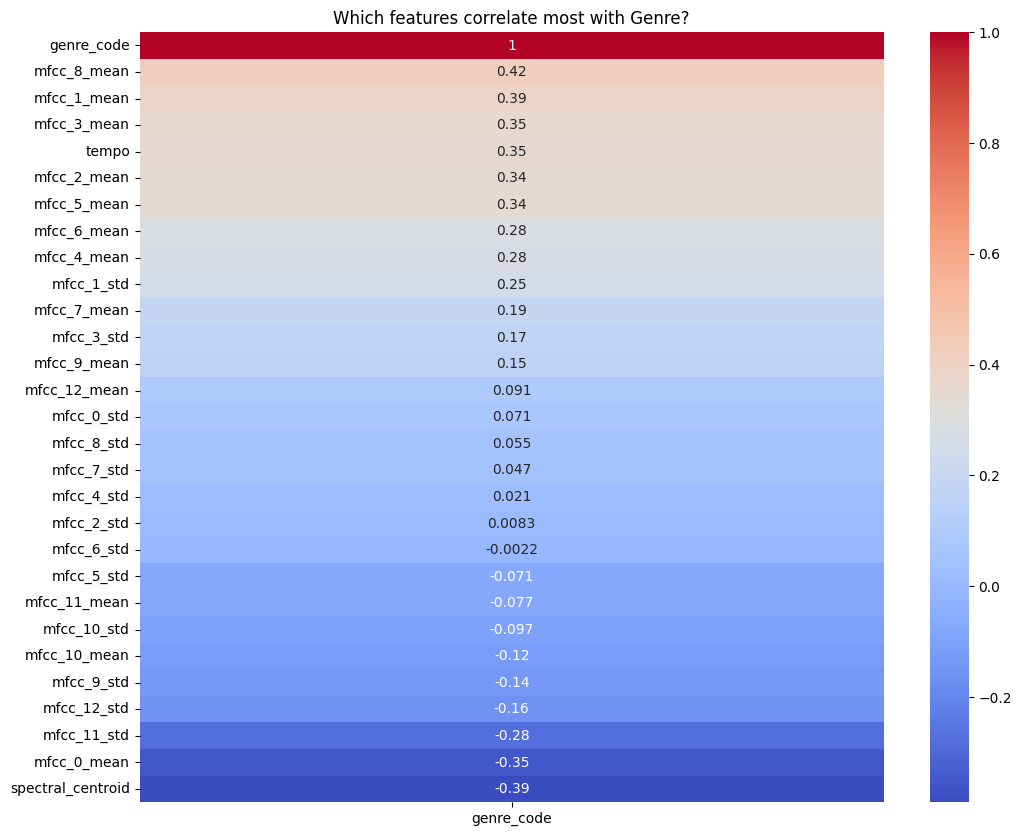

In [9]:
# 1. Create a copy and encode the genre
df_numeric = df.copy()
df_numeric['genre_code'] = df_numeric['genre'].astype('category').cat.codes

# 2. Use 'numeric_only=True' to ignore the filename and genre strings
# This prevents the "could not convert string to float" error
correlation_matrix = df_numeric.corr(numeric_only=True)

# 3. Plot the heatmap specifically for the genre_code
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['genre_code']].sort_values(by='genre_code', ascending=False), 
            annot=True, 
            cmap='coolwarm')

plt.title('Which features correlate most with Genre?')
plt.show()

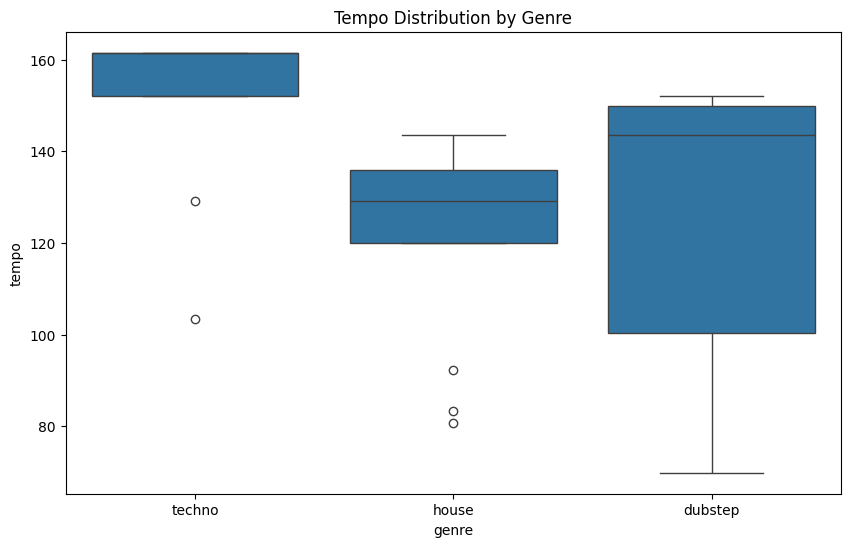

In [2]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='tempo', data=df)
plt.title('Tempo Distribution by Genre')
plt.show()

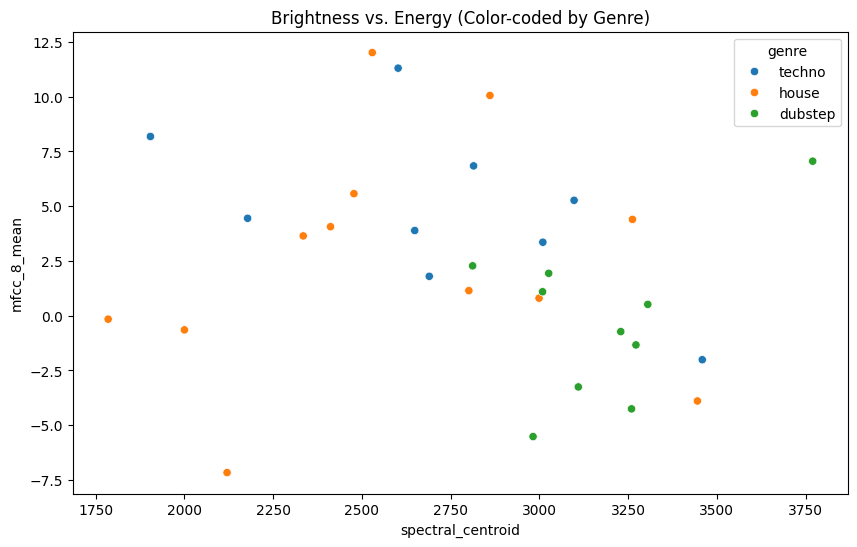

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='spectral_centroid', y='mfcc_8_mean', hue='genre', data=df)
plt.title('Brightness vs. Energy (Color-coded by Genre)')
plt.show()

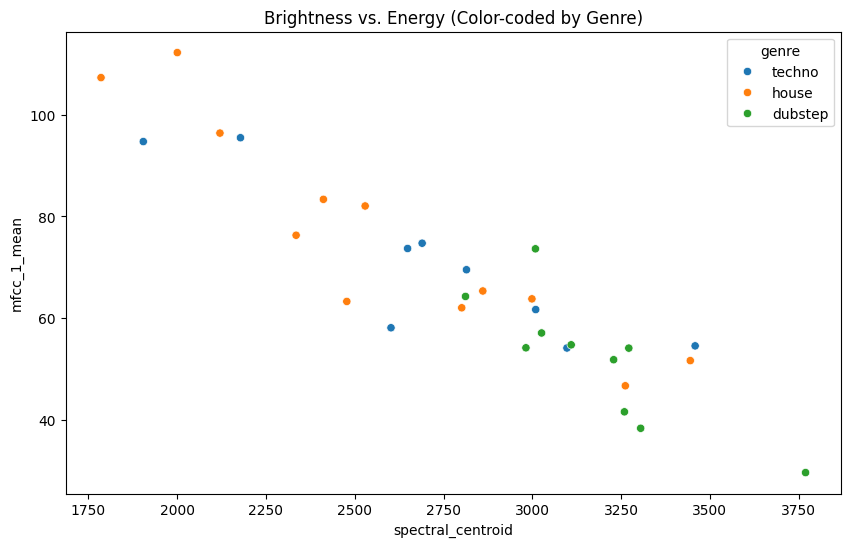

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='spectral_centroid', y='mfcc_1_mean', hue='genre', data=df)
plt.title('Brightness vs. Energy (Color-coded by Genre)')
plt.show()

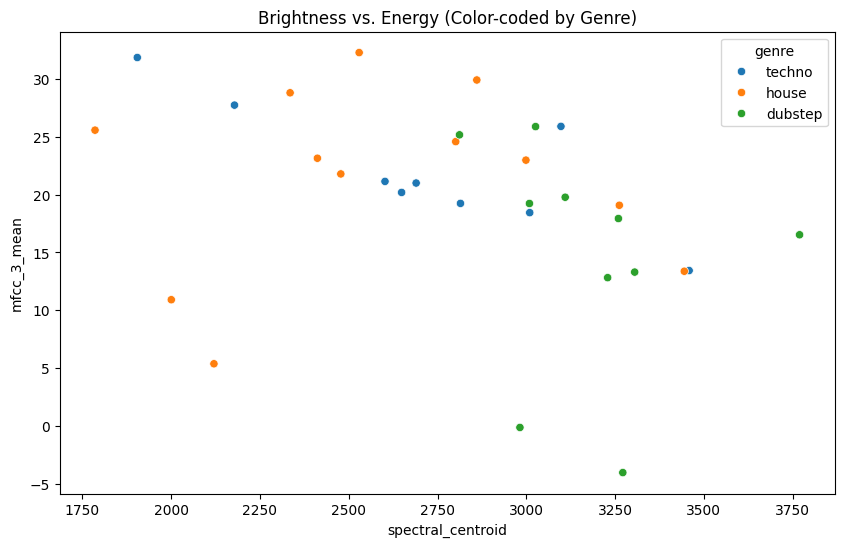

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='spectral_centroid', y='mfcc_3_mean', hue='genre', data=df)
plt.title('Brightness vs. Energy (Color-coded by Genre)')
plt.show()

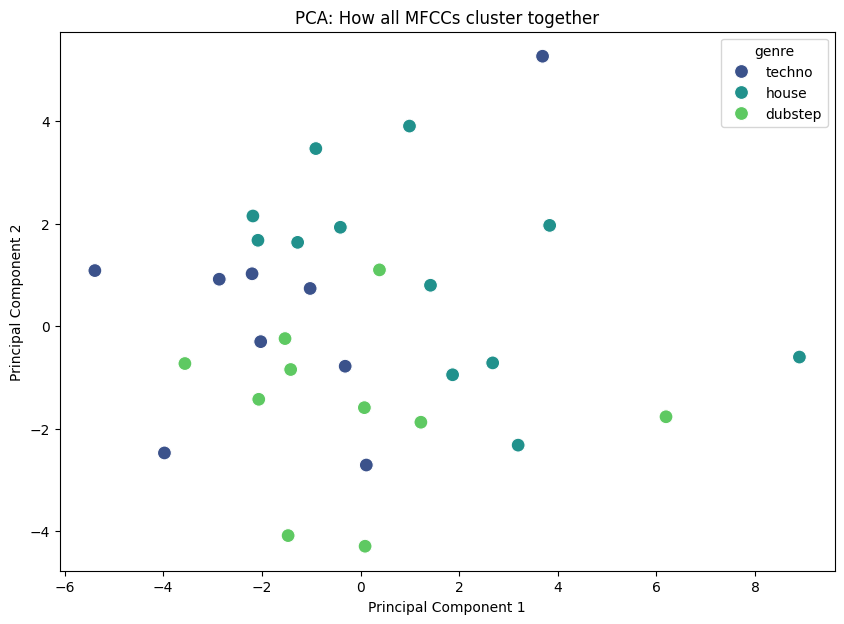

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Select only the MFCC columns (Means and Stds)
mfcc_cols = [col for col in df.columns if 'mfcc' in col]
X_mfcc = df[mfcc_cols]

# 2. Scale the data (Mandatory for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_mfcc)

# 3. Reduce to 2 Dimensions
pca = PCA(n_components=2)
pca_results = pca.fit_transform(X_scaled)

# 4. Plot the results
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=pca_results[:, 0], 
    y=pca_results[:, 1], 
    hue=df['genre'], 
    palette='viridis',
    s=100
)
plt.title('PCA: How all MFCCs cluster together')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()